In [89]:
#Importing Libraries
import numpy as np
import torch.nn as nn
import cv2
from skimage.data import shepp_logan_phantom
import torch
from google.colab.patches import cv2_imshow # This is for displaying images in Google Colab

In [90]:
# reading the Image
image=cv2.imread("/content/image.jpg")

In [91]:
# Resizing the Image
image=cv2.resize(image, (400, 400))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [92]:
# Add Noise to the Image
image_noisy=np.random.poisson(image)

In [93]:
# Displaying Function
def cv2disp(name, image):
  cv2_imshow(image)

In [145]:
# Convolution Function
class convolution(nn.Module):
  def __init__(self, kernel_size):
    super(convolution, self).__init__()
    self.conv1kernel=nn.Conv2d(1,1,kernel_size, padding=(int(kernel_size/2),int(kernel_size/2)), bias=False)
    self.conv1kernel.weight.data.fill_(1.0/(kernel_size*kernel_size))
  def forward(self, x):
    x=self.conv1kernel(x)
    return x


In [125]:
# Changing the Noisy Image to Tensor
torch_noisy=torch.from_numpy(image_noisy).float().unsqueeze(0).unsqueeze(0)

In [161]:
# Displaying a Sample Kernel
kernel_fixed=convolution(15)
kernel_torch=list(kernel_fixed.parameters())[0]
cv2disp('l', np.squeeze(kernel_torch.detach().numpy()))

In [162]:
# Training the Model
kernel=convolution(15)
loss=nn.MSELoss()
torch_image=torch.from_numpy(image).float().unsqueeze(0).unsqueeze(0)
optimiser=torch.optim.Adam(kernel.parameters(), lr=0.01)
for i in range (1000):
  output_kernel=kernel(torch_noisy)
  loss_amount=loss(output_kernel, torch_image)
  loss_amount.backward()
  optimiser.step()
  optimiser.zero_grad()
  output=np.squeeze(output_kernel.detach().numpy())

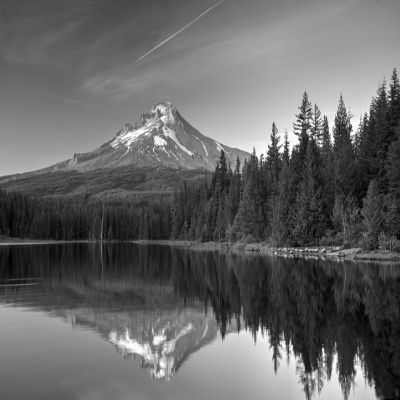

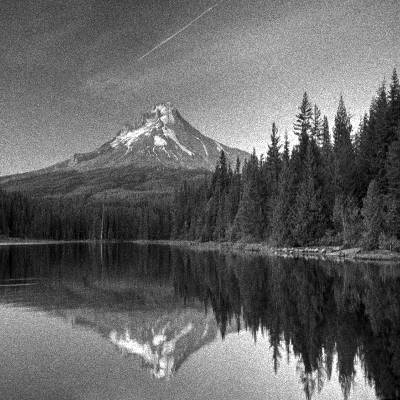

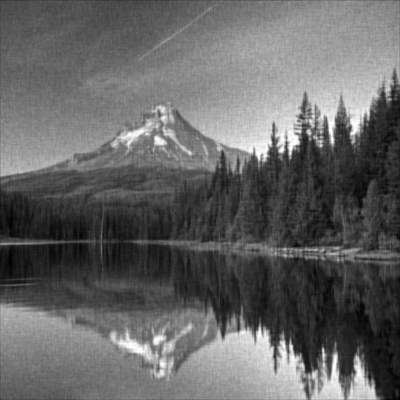

In [163]:
# Displaying the Main Image, Noisy Image, Kernel, and Output Image
cv2disp('Main', image)
cv2disp('Noisy', image_noisy)
kernel_parameters=list(kernel_fixed.parameters())[0]
cv2disp('kernel', np.squeeze(kernel_parameters.detach().numpy()))
cv2disp('ouput', output)